In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimg
%matplotlib inline

# Ajustement d'images par correction gamma
Soit $I : \mathbb R^2 \mapsto \mathbb R$ une image. Appliquer une correction gamma à $I$ revient à faire pour tout voxel $(x, y)$ de $I$:
$$ I_{out}(x,y) = I(x,y)^\gamma $$

In [2]:
got = mimg.imread('images/got.jpg')

In [22]:
def gamma(image, gamma):
    return (((image / 255) ** gamma) * 255).astype(np.uint8)

#### $\gamma \in \{O.1, 0.5, 0.9\}$

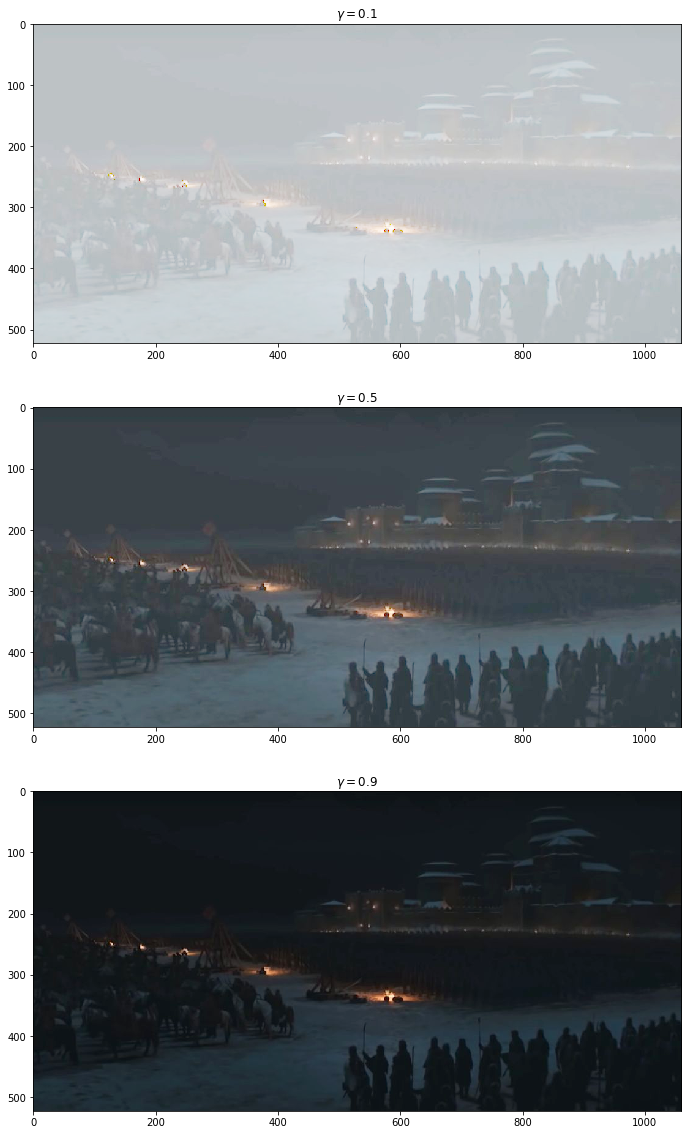

In [30]:
fig, plts = plt.subplots(3, 1, figsize=(40,20))
for p, g in zip(plts, (0.1, 0.5, 0.9)):
    p.imshow(gamma(got, g))
    p.set_title(f'$\gamma = {g}$')

#### $\gamma \in \{2,3,4\}$

In [105]:
def map_imshow(func, xs, title=None, layout='h', figsize=(15, 15), extra_imshow={}):
    w, h = (len(xs), 1) if layout == 'h' else (1, len(xs))
    if not title or callable(title):
        ts = [''] * len(xs)
    fig, plts = plt.subplots(w, h, figsize=(40,20))
    for p, x, t in zip(plts, xs, ts):
        p.imshow(func(x), **extra_imshow)
        p.set_title(t if not callable(title) else title(x))

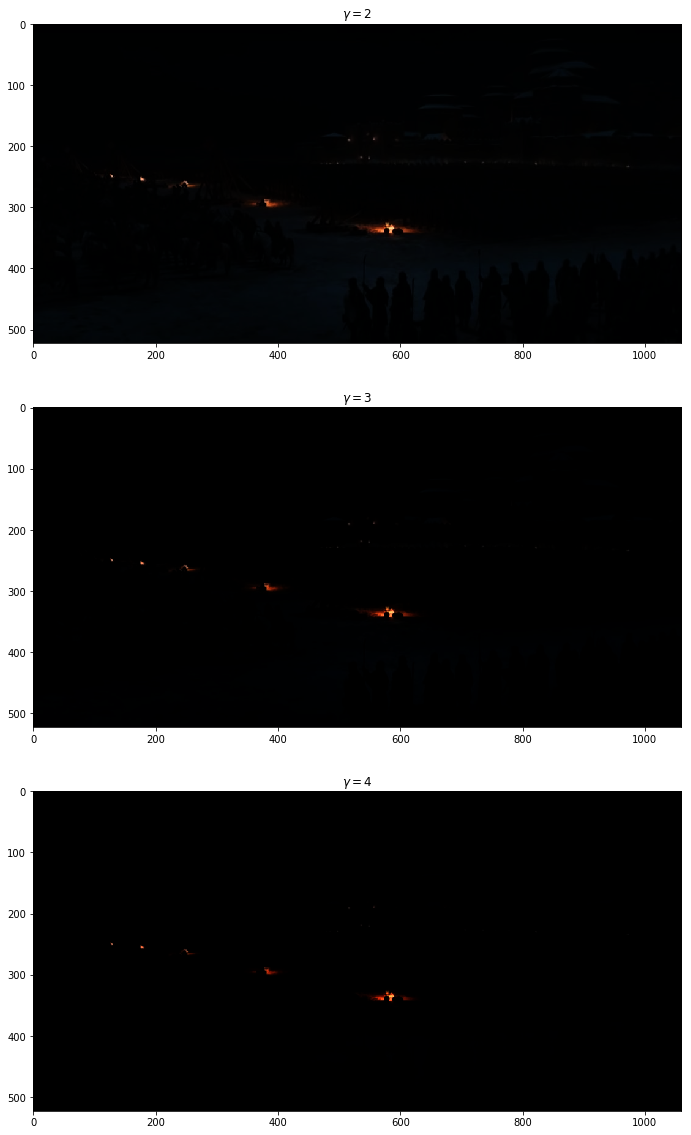

In [106]:
map_imshow(lambda g: gamma(got, g),
           (2, 3, 4), 
           lambda g: f'$\gamma = {g}$',
           figsize=(40,20))

# Filtrage d'images

In [64]:
boat = mimg.imread('images/boat512.gif')

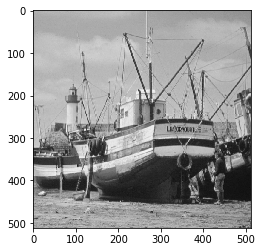

In [73]:
plt.imshow(boat, cmap='gray')

In [89]:
def kernel_template(f, w, h):
    assert w % 2 == 1 and h % 2 == 1
    return [[f(x, y) for x in range(-(w//2), 1 + w//2)]
            for y in range(-(h//2), 1 + h//2)]

In [90]:
kernel_template(lambda x, y: (x, y), 3, 3)

[[(-1, -1), (0, -1), (1, -1)],
 [(-1, 0), (0, 0), (1, 0)],
 [(-1, 1), (0, 1), (1, 1)]]

In [43]:
from math import pi, exp
from scipy.signal import convolve2d

### Gaussian kernel

In [75]:
def GK_xy(sigma, x, y):
    return (1 / (2 * pi * sigma ** 2)) * exp((-1 / (2 * sigma ** 2)) * (x ** 2 + y ** 2))

In [92]:
def gaussian_kernel(sigma, n):
    return kernel_template(lambda x, y: GK_xy(sigma, x, y), n, n)

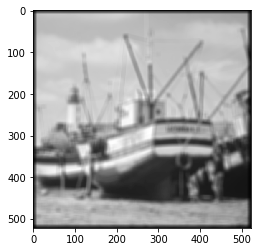

In [98]:
plt.imshow(convolve2d(boat, gaussian_kernel(200, 11)), cmap='gray')

### Mean kernel

In [94]:
def mean_kernel(n):
    return kernel_template(lambda x, y: 1, n, n)

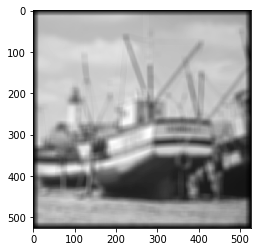

In [97]:
plt.imshow(convolve2d(boat, mean_kernel(15)), cmap='gray')

### Median kernel

In [99]:
def median_kernel(n):
    # TODO
    pass

## Filters & noise

Given a noise $N$, $$I_{noised} = I + N$$

In [103]:
noisy_boat = boat + np.random.normal(0, 20, boat.shape)

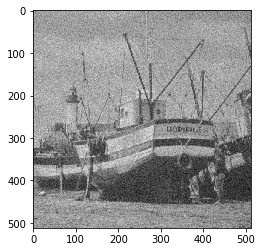

In [104]:
plt.imshow(noisy_boat, cmap='gray')

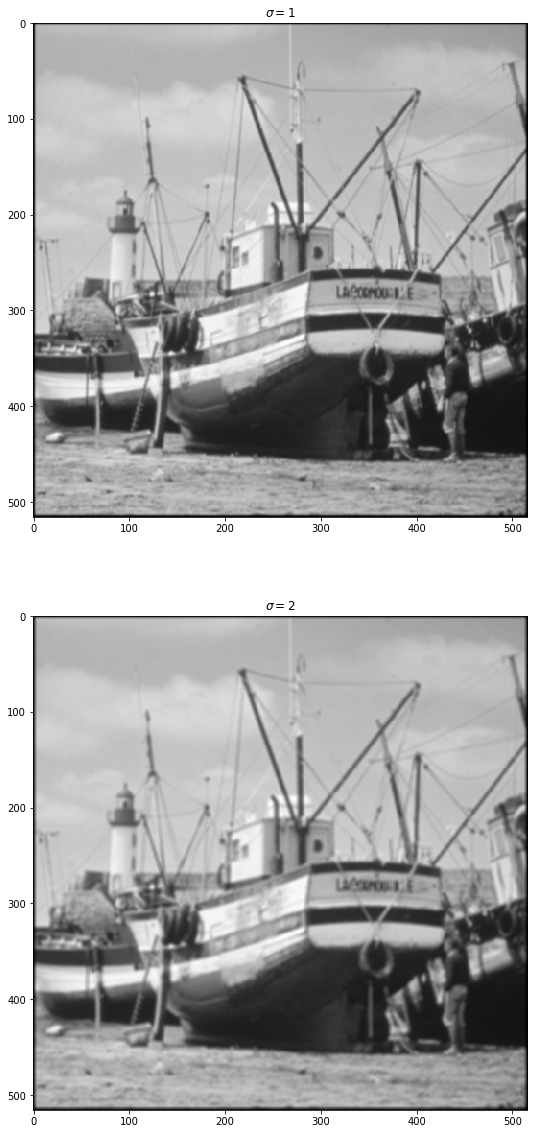

In [111]:
map_imshow(lambda sigma: convolve2d(boat, gaussian_kernel(sigma, 5)),
           (1, 2),
           title=lambda s: f'$\sigma = {s}$',
           extra_imshow=dict(cmap='gray'))